In [123]:
import pandas as pd
import sys
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sys.path

['c:\\Users\\alejo\\Documents\\Materias UdeA\\2024-1\\Código\\Caso_ejemplo',
 'c:\\Users\\alejo\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip',
 'c:\\Users\\alejo\\AppData\\Local\\Programs\\Python\\Python311\\DLLs',
 'c:\\Users\\alejo\\AppData\\Local\\Programs\\Python\\Python311\\Lib',
 'c:\\Users\\alejo\\AppData\\Local\\Programs\\Python\\Python311',
 '',
 'C:\\Users\\alejo\\AppData\\Roaming\\Python\\Python311\\site-packages',
 'C:\\Users\\alejo\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32',
 'C:\\Users\\alejo\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib',
 'C:\\Users\\alejo\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin',
 'c:\\Users\\alejo\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages']

In [106]:
#Lectura de archivos
bd=pd.read_csv("rvm.csv")

C:\Users\alejo\AppData\Local\Temp\ipykernel_820\3816644531.py:2: DtypeWarning: Columns (0,1,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  bd=pd.read_csv("rvm.csv")


In [ ]:
bd

In [107]:
# Eliminar las dos últimas columnas vacías
bd = bd.iloc[:, :-2]

In [ ]:
bd

In [108]:
# Eliminar los datos nulos
bd = bd.dropna()

In [ ]:
bd

In [109]:
# Renombrar las columnas a nombres más simples y en minúsculas
nuevos_nombres = {
    "id": "id",
    "Fecha de Nacimiento": "fecha_nacimiento",
    "Edad": "edad",
    "Genero": "genero",
    "Dirección": "direccion",
    "UBICACION DEL PUNTO DE RECOLECCION": "ubicacion_recoleccion",
    "NUMERO DE VISITAS POR USUARIO": "visitas_usuario",
    "VOLUMEN GENERADO POR USUARIO (g)": "volumen_generado"
}
bd = bd.rename(columns=nuevos_nombres)
bd

,id,fecha_nacimiento,edad,genero,direccion,ubicacion_recoleccion,visitas_usuario,volumen_generado
0,USK21705,3/5/1987 0:00,32.0,Mujer,carrera 51 aa 31 ae 10,Sin Interaccion,Sin Interaccion,Sin Interaccion
1,USK21704,10/26/1992 4:00,26.0,Mujer,calle 94 # 51b 15,Plaza Mayor,1,69
2,USK21703,12/27/1989 5:00,29.0,Hombre,carrera 45C #38B sur 10,Plaza Mayor,1,1
3,USK21702,3/12/2000 5:00,19.0,Mujer,Crr 48B # 106-49,Sin Interaccion,Sin Interaccion,Sin Interaccion
4,USK21701,1/31/1994 5:00,25.0,Mujer,carrera 36 36 # 65 dd 14,Coltejer,1,18
...,...,...,...,...,...,...,...,...
21471,USK234,1/2/1996 0:00,23.0,Hombre,Calle 47 # 72 b 46,"Aventura, Ruta N, Kaptadora 71, , Kaptadora 70",18,607
21494,USK211,6/6/2017 0:00,1.0,Hombre,"Campo Valdes, MedellÃ­n - Antioquia, Colombia",Sin Interaccion,Sin Interaccion,Sin Interaccion
21501,USK204,1/13/1972 0:00,47.0,Hombre,"La PiÃ±uela, MedellÃ­n - Antioquia, Colombia",", Aventura, Kaptadora 70, Ruta N",72,"4,775"
21513,USK192,4/10/1988 0:00,30.0,Mujer,Calle 101B 72 - 13,"Kaptadora 71, Ruta N, , Kaptadora 70",58,229


In [110]:
# Eliminar las filas que contienen 'Sin Interaccion' en la columna 'visitas_usuario'
bd = bd[bd['visitas_usuario'] != 'Sin Interaccion']

# Reiniciar los índices después de eliminar las filas
bd = bd.reset_index(drop=True)
bd

,id,fecha_nacimiento,edad,genero,direccion,ubicacion_recoleccion,visitas_usuario,volumen_generado
0,USK21704,10/26/1992 4:00,26.0,Mujer,calle 94 # 51b 15,Plaza Mayor,1,69
1,USK21703,12/27/1989 5:00,29.0,Hombre,carrera 45C #38B sur 10,Plaza Mayor,1,1
2,USK21701,1/31/1994 5:00,25.0,Mujer,carrera 36 36 # 65 dd 14,Coltejer,1,18
3,USK21697,10/10/2041 5:00,23.0,Hombre,carreraa 40 # 78 - 66,Coltejer,2,27
4,USK21696,4/20/1949 5:00,69.0,Mujer,calle 72A #45-48,Ruta N,1,57
...,...,...,...,...,...,...,...,...
2806,USK360,3/24/1996 0:00,23.0,Mujer,Cra 39,"Kaptadora 70, Kaptadora 71, Ruta N",19,203
2807,USK234,1/2/1996 0:00,23.0,Hombre,Calle 47 # 72 b 46,"Aventura, Ruta N, Kaptadora 71, , Kaptadora 70",18,607
2808,USK204,1/13/1972 0:00,47.0,Hombre,"La PiÃ±uela, MedellÃ­n - Antioquia, Colombia",", Aventura, Kaptadora 70, Ruta N",72,"4,775"
2809,USK192,4/10/1988 0:00,30.0,Mujer,Calle 101B 72 - 13,"Kaptadora 71, Ruta N, , Kaptadora 70",58,229


In [ ]:
bd.info()

In [111]:
# Convertir la columna de fecha a formato de fecha sin hora
bd['fecha_nacimiento'] = pd.to_datetime(bd['fecha_nacimiento'], errors='coerce', format='%m/%d/%Y %H:%M', infer_datetime_format=True)
bd['fecha_nacimiento'] = bd['fecha_nacimiento'].dt.date


C:\Users\alejo\AppData\Local\Temp\ipykernel_820\2709647846.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bd['fecha_nacimiento'] = pd.to_datetime(bd['fecha_nacimiento'], errors='coerce', format='%m/%d/%Y %H:%M', infer_datetime_format=True)


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


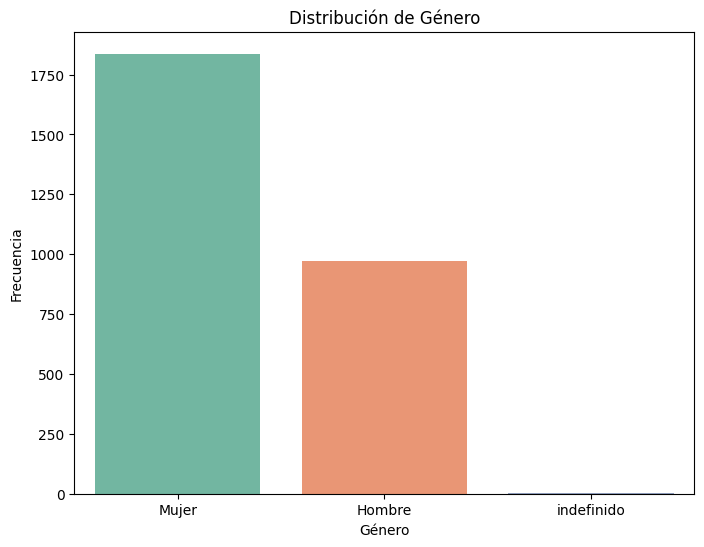

In [112]:
# Gráfico de barras para la variable 'genero'
plt.figure(figsize=(8, 6))
sns.countplot(data=bd, x='genero', palette='Set2')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


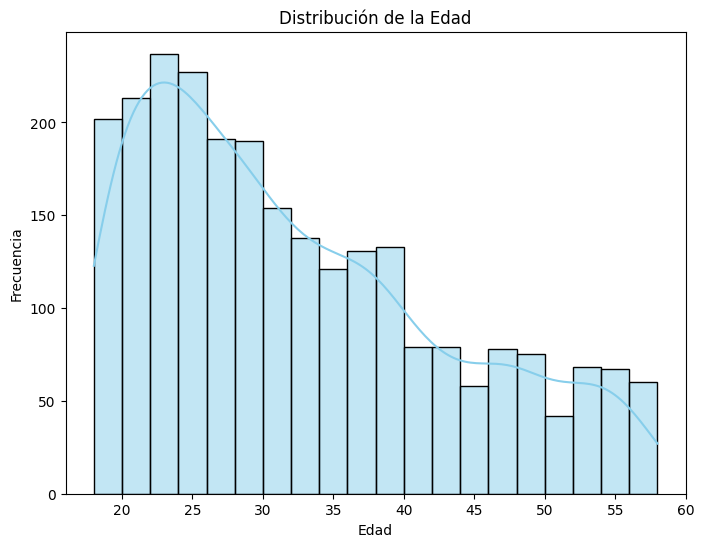

In [113]:
# Calcular el percentil 5 y el percentil 95 para la variable 'edad'
percentil_5 = bd['edad'].quantile(0.05)
percentil_95 = bd['edad'].quantile(0.95)

# Filtrar las filas que están dentro del rango de percentiles
bd = bd[(bd['edad'] >= percentil_5) & (bd['edad'] <= percentil_95)]

# Gráfico de histograma para la variable 'edad'
plt.figure(figsize=(8, 6))
sns.histplot(bd['edad'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [114]:
# Convertir la columna 'visitas_usuario' a tipo numérico
bd['visitas_usuario'] = pd.to_numeric(bd['visitas_usuario'], errors='coerce')

# Calcular el rango intercuartílico (IQR)
Q1 = bd['visitas_usuario'].quantile(0.25)
Q3 = bd['visitas_usuario'].quantile(0.75)
IQR = Q3 - Q1

# Definir el límite inferior y superior para identificar los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los valores atípicos
data_filtered = bd[(bd['visitas_usuario'] >= lower_bound) & (bd['visitas_usuario'] <= upper_bound)]

# Convertir la columna 'volumen_generado' a tipo numérico
bd['volumen_generado'] = pd.to_numeric(bd['volumen_generado'], errors='coerce')

# Calcular el rango intercuartílico (IQR)
Q1 = bd['volumen_generado'].quantile(0.25)
Q3 = bd['volumen_generado'].quantile(0.75)
IQR = Q3 - Q1

# Definir el límite inferior y superior para identificar los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los valores atípicos
data_filtered = bd[(bd['volumen_generado'] >= lower_bound) & (bd['volumen_generado'] <= upper_bound)]



C:\Users\alejo\AppData\Local\Temp\ipykernel_820\1420193970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd['visitas_usuario'] = pd.to_numeric(bd['visitas_usuario'], errors='coerce')
C:\Users\alejo\AppData\Local\Temp\ipykernel_820\1420193970.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd['volumen_generado'] = pd.to_numeric(bd['volumen_generado'], errors='coerce')


In [93]:
bd2 = pd.read_csv('bd_modificado.csv')

In [ ]:
bd2

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


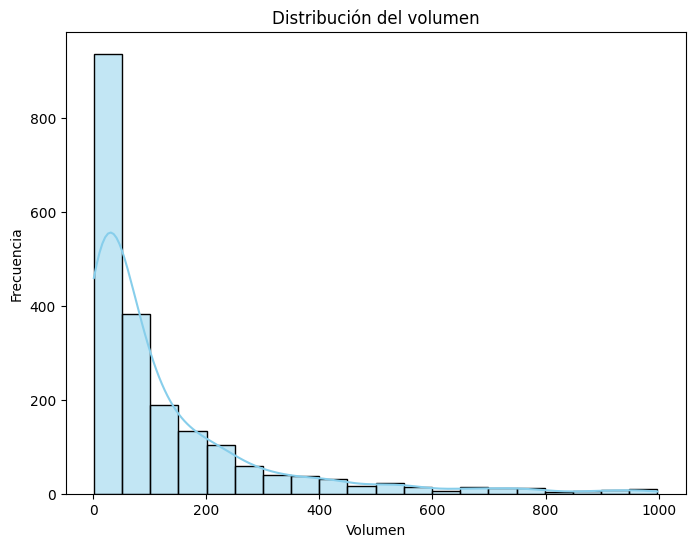

In [115]:
# Gráfico de histograma para la variable 'volumen generado'
plt.figure(figsize=(8, 6))
sns.histplot(bd2['volumen_generado'], bins=20, kde=True, color='skyblue')
plt.title('Distribución del volumen')
plt.xlabel('Volumen')
plt.ylabel('Frecuencia')
plt.show()

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


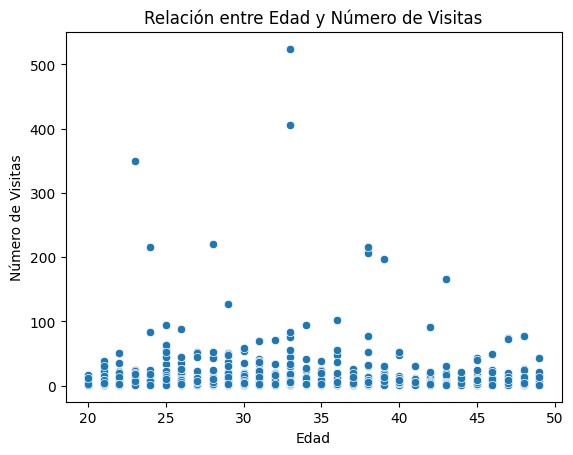

In [116]:
# Realizar un análisis exploratorio de datos (EDA)
# relación entre la edad y el número de visitas
sns.scatterplot(x='edad', y='visitas_usuario', data=bd2)
plt.title('Relación entre Edad y Número de Visitas')
plt.xlabel('Edad')
plt.ylabel('Número de Visitas')
plt.show()

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


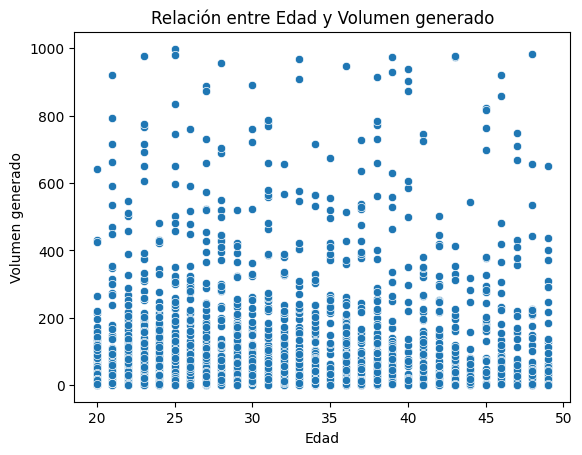

In [117]:
# Realizar un análisis exploratorio de datos (EDA)
# relación entre la edad y el volumen generado
sns.scatterplot(x='edad', y='volumen_generado', data=bd2)
plt.title('Relación entre Edad y Volumen generado')
plt.xlabel('Edad')
plt.ylabel('Volumen generado')
plt.show()

# Regresión lineal

In [ ]:
# Seleccionar las variables relevantes
# 'edad', 'genero' y 'ubicacion_recoleccion' como variables predictoras
X = bd2[['edad', 'genero', 'ubicacion_recoleccion']]
y = bd2['visitas_usuario']


In [ ]:
# Codificar variables categóricas
X = pd.get_dummies(X, columns=['genero', 'ubicacion_recoleccion'], drop_first=True)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el modelo
print('Error Cuadrático Medio (MSE):', mean_squared_error(y_test, y_pred))
print('Coeficiente de Determinación (R^2):', r2_score(y_test, y_pred))

# Interpretar los coeficientes del modelo
coeficientes = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_})
print(coeficientes)

In [ ]:
#relación entre las visitas predichas y reales
plt.scatter(y_test, y_pred)
plt.xlabel('Número de Visitas Real')
plt.ylabel('Número de Visitas Predicho')
plt.title('Predicción vs Real')
plt.show()

# Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
bd2

,id,fecha_nacimiento,edad,genero,direccion,ubicacion_recoleccion,visitas_usuario,volumen_generado
0,USK21704,1992-10-26,26.0,Mujer,calle 94 # 51b 15,Plaza Mayor,1,69.0
1,USK21703,1989-12-27,29.0,Hombre,carrera 45C #38B sur 10,Plaza Mayor,1,1.0
2,USK21701,1994-01-31,25.0,Mujer,carrera 36 36 # 65 dd 14,Coltejer,1,18.0
3,USK21697,2041-10-10,23.0,Hombre,carreraa 40 # 78 - 66,Coltejer,2,27.0
4,USK21695,1997-12-04,21.0,Hombre,Cll 28sur # 43A-70,U. CES,1,1.0
...,...,...,...,...,...,...,...,...
2099,USK360,1996-03-24,23.0,Mujer,Cra 39,"Kaptadora 70, Kaptadora 71, Ruta N",19,203.0
2100,USK234,1996-01-02,23.0,Hombre,Calle 47 # 72 b 46,"Aventura, Ruta N, Kaptadora 71, , Kaptadora 70",18,607.0
2101,USK204,1972-01-13,47.0,Hombre,"La PiÃ±uela, MedellÃ­n - Antioquia, Colombia",", Aventura, Kaptadora 70, Ruta N",72,NaN
2102,USK192,1988-04-10,30.0,Mujer,Calle 101B 72 - 13,"Kaptadora 71, Ruta N, , Kaptadora 70",58,229.0


In [102]:
data_2=bd2.copy()
data2 = data_2.drop(columns=['id', 'fecha_nacimiento', 'direccion'])
data_3 = pd.get_dummies(data2)
# Imputar valores faltantes con la media
data_3.fillna(data_3.mean(), inplace=True)
data_3

,edad,visitas_usuario,volumen_generado,genero_Hombre,genero_Mujer,genero_indefinido,"ubicacion_recoleccion_, Aventura, Kaptadora 70","ubicacion_recoleccion_, Aventura, Kaptadora 70, Ruta N","ubicacion_recoleccion_, Coltejer","ubicacion_recoleccion_, Coltejer, Aventura, Kaptadora 71, Kaptadora 70, Ruta N",...,"ubicacion_recoleccion_Unicentro, CESDE","ubicacion_recoleccion_Unicentro, Coltejer","ubicacion_recoleccion_Unicentro, Coltejer, Ruta N","ubicacion_recoleccion_Unicentro, Kaptadora 71","ubicacion_recoleccion_Unicentro, Puerta del Norte","ubicacion_recoleccion_Unicentro, Ruta N","ubicacion_recoleccion_Unicentro, Ruta N, Kaptadora 70","ubicacion_recoleccion_Unicentro, Santafe","ubicacion_recoleccion_Unicentro, Terminal del Norte, Ruta N, Aventura","ubicacion_recoleccion_Unicentro, U. CES"
0,26.0,1,69.000000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,29.0,1,1.000000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,25.0,1,18.000000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,23.0,2,27.000000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,21.0,1,1.000000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,23.0,19,203.000000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2100,23.0,18,607.000000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2101,47.0,72,124.497656,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2102,30.0,58,229.000000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [103]:
# Dividir los datos en características (X) y la variable objetivo (y)
X_3 = data_3.drop(columns=["visitas_usuario"])
y_3 = data_3["visitas_usuario"]

# Inicializar el modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=1000, random_state=42)

# Entrenar el modelo
random_forest.fit(X_3, y_3)

# Predecir el número de visitas mensuales para cada persona en la base de datos
data_3["visitas_predichas"] = random_forest.predict(X_3)

In [121]:
# Calcular métricas de desempeño
mse = mean_squared_error(y_3, data_3["visitas_predichas"])
r2 = r2_score(y_3, data_3["visitas_predichas"])

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Calcular la importancia de las variables
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Obtener las cuatro variables más importantes
top_variables = X_3.columns[indices[:4]]
top_importances = importances[indices[:4]]

# Imprimir las cuatro variables más importantes junto con sus valores de importancia
for variable, importancia in zip(top_variables, top_importances):
    print(f"Variable: {variable}, Importancia: {importancia}")


Mean Squared Error: 58.93766893261349
R^2 Score: 0.8764681126996781
Variable: ubicacion_recoleccion_Aventura, Santafe, Kaptadora 71, Puerta del Norte, Ruta N, CESDE, , La Solar, Terminal del Norte, ADMIN, Coltejer, Kaptadora 70, U. CES, Colaboramerica, Importancia: 0.2286464192630609
Variable: volumen_generado, Importancia: 0.16398856865008474
Variable: ubicacion_recoleccion_Puerta del Norte, Terminal del Norte, Unicentro, Aventura, Ruta N, La Solar, , Santafe, U. CES, CESDE, Kaptadora 71, Coltejer, Plaza Mayor, Kaptadora 70, Importancia: 0.12151807926749383
Variable: ubicacion_recoleccion_Coltejer, Unicentro, Importancia: 0.08004102776603106


In [104]:
columnas_ubicaciones = [col for col in data_3.columns if 'ubicacion_recoleccion' in col]

# Calcular el promedio de visitas mensuales predichas para cada ubicación en el DataFrame
ubicaciones_promedio = data_3[columnas_ubicaciones].mean().reset_index()
ubicaciones_promedio.columns = ['ubicacion_recoleccion', 'visitas_predichas']

# Seleccionar las tres ubicaciones con los valores de predicción más altos
sitios_potenciales = ubicaciones_promedio.nlargest(3, "visitas_predichas")

print("Sitios potenciales recomendados para ubicar nuevas máquinas expendedoras:")
print(sitios_potenciales)

Sitios potenciales recomendados para ubicar nuevas máquinas expendedoras:
              ubicacion_recoleccion  visitas_predichas
55   ubicacion_recoleccion_Coltejer           0.231939
152    ubicacion_recoleccion_Ruta N           0.199620
217    ubicacion_recoleccion_U. CES           0.073669
